# SVC Test on Prepared Data

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [46]:
iris = load_iris()

In [61]:
features = iris["data"]
features = pd.DataFrame(features, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
features = features.drop(columns=["petal_length", "petal_width"])

In [62]:
target = iris["target"]

In [63]:
model = SVC(C=1, kernel="rbf", gamma="auto")

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [65]:
model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
model.score(X_test, y_test)

0.8666666666666667

In [67]:
cross_val_score(model, X_test, y_test, cv=5).mean()

0.838095238095238

In [95]:
def plot_svm_decision_function(model, X, y):
    
    h = .02  # step size in the mesh
    
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']

    plt.figure(figsize=(3,4))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("SVC Kernel='rbf'")

    plt.show()

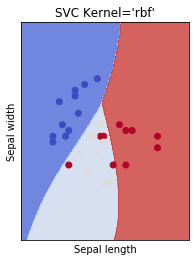

In [96]:
plot_svm_decision_function(model, X_test.values, y_test)